<a href="https://colab.research.google.com/github/komolcia/SEA_EU/blob/main/1_pun_detectionFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 32.3 MB/s eta 0:00:00


In [3]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from random import randint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import pandas as pd
import openai
import os
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score,classification_report
import pandas as pd
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import re
from mlxtend.plotting import plot_learning_curves
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import RidgeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
data_train = pd.read_json("joker-detection-FR-train.json")
location_train=pd.read_json("joker_location_FR_train.json")
data_train=data_train.merge(location_train,how='outer')
y=[]
for x in data_train['wordplay']:
    if x =="no":
        y.append(False)
    else:
        y.append(True)
data_train['pun_label']=y
data_train

,id,text,wordplay,location,pun_label
0,fr_10031,"Dans les équations avec des nombres au carré, ...",yes,racine,True
1,fr_8530,""" Ne restez pas planté là ! "", dit le jardinier.",yes,Ne restez pas planté là,True
2,fr_9837,"Mon peigne est inestimable, je ne peux pas m'e...",no,NaN,False
3,fr_3674,Q : Qu'est-ce qui est le plus important lorsqu...,yes,se la couler douce,True
4,fr_10565,"""Je n'arrive pas à croire qu'il y ait 527 986 ...",no,NaN,False
...,...,...,...,...,...
3997,fr_5211,"Dans cette boîte, j'ai un serpent de 10 pieds....",yes,pieds,True
3998,fr_6993,Pourquoi le chien n'a pas pris de café ? Car i...,yes,haletait,True
3999,fr_14971,"La langue n'est pas très lourde, pourtant cert...",NaN,tenir,True
4000,fr_15220,Les vieux mécaniciens automobiles ne meurent j...,NaN,échappe,True


In [6]:
data_test=pd.read_json("/content/joker-detection-FR-test.json")
location_test=pd.read_json("/content/joker_location_FR_test.json")
data_test=data_test.merge(location_test)
data_test

,id,text
0,fr_0,L'haltérophile n'arrivait pas à oublier les cr...
1,fr_2,Je me suis plié en quatre pour avoir une bonne...
2,fr_3,"Rongée par l'idée du péché, la princesse décid..."
3,fr_4,Certaines personnes prennent des photos magnif...
4,fr_5,"Docteur, docteur, je continue à penser que je ..."
...,...,...
6650,fr_16859,Lorsqu'on m'a demandé si j'étais bilingue ou n...
6651,fr_16865,J'ai voulu enregistrer mon nouveau single à Za...
6652,fr_16866,Le débat sur le lancement d’une nouvelle fusée...
6653,fr_16867,L'hôtel Gatewater accueille des hommes d'affai...


In [7]:
import nltk
nltk.download('punkt')
nltk_tokens=[]
a=[]
b=[]
istrue=False
c=[]
for x in data_train.text:
    import nltk
    nltk_tokens.append(nltk.word_tokenize(x))
print(nltk_tokens)
for y in range(0,len(nltk_tokens)):
    for x in range(0,len(nltk_tokens[y])):
        if(nltk_tokens[y][x]== data_train['location'][y] and istrue==False):
            c.append(x)
            istrue=True
        a.append(x)
    if(istrue==False):
        c.append(-1)
    b.append(a)
    istrue=False
    a=[]
data_train["the_indexes"]=b
data_train["index"]=c
X=b
y=x
data_train
X=data_train["index"].values.astype("int").reshape(-1, 1)
y = data_train["pun_label"].values 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['Dans', 'les', 'équations', 'avec', 'des', 'nombres', 'au', 'carré', ',', 'je', "n'arrive", 'jamais', 'à', 'trouver', 'la', 'racine', 'du', 'problème', '.'], ['``', 'Ne', 'restez', 'pas', 'planté', 'là', '!', '``', ',', 'dit', 'le', 'jardinier', '.'], ['Mon', 'peigne', 'est', 'inestimable', ',', 'je', 'ne', 'peux', 'pas', "m'en", 'séparer', '.'], ['Q', ':', "Qu'est-ce", 'qui', 'est', 'le', 'plus', 'important', 'lorsque', "l'on", 'navigue', 'une', 'rivière', 'ou', 'la', 'mer', '?', 'A', ':', 'De', 'se', 'la', 'couler', 'douce', '!'], ['``', 'Je', "n'arrive", 'pas', 'à', 'croire', "qu'il", 'y', 'ait', '527', '986', 'abeilles', 'dans', 'ruche', '!', "''", 'racompta', 'Tom', '.'], ['Les', 'pâtes', 'c', '’', 'est', 'apestossant', '.'], ['Quand', 'je', 'fais', 'des', 'équations', 'avec', 'des', 'carrés', 'parfaits', ',', 'je', "n'arrive", 'jamais', 'à', 'trouver', 'la', 'racine', 'du', 'problème', '.'], ['A', 'force', 'de', 'se', 'manger', 'des', 'vitres', ',', 'il', 'a', 'appris', 'à', 's

In [8]:
data_train

,id,text,wordplay,location,pun_label,the_indexes,index
0,fr_10031,"Dans les équations avec des nombres au carré, ...",yes,racine,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",15
1,fr_8530,""" Ne restez pas planté là ! "", dit le jardinier.",yes,Ne restez pas planté là,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",-1
2,fr_9837,"Mon peigne est inestimable, je ne peux pas m'e...",no,NaN,False,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",-1
3,fr_3674,Q : Qu'est-ce qui est le plus important lorsqu...,yes,se la couler douce,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",-1
4,fr_10565,"""Je n'arrive pas à croire qu'il y ait 527 986 ...",no,NaN,False,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",-1
...,...,...,...,...,...,...,...
3997,fr_5211,"Dans cette boîte, j'ai un serpent de 10 pieds....",yes,pieds,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",9
3998,fr_6993,Pourquoi le chien n'a pas pris de café ? Car i...,yes,haletait,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",13
3999,fr_14971,"La langue n'est pas très lourde, pourtant cert...",NaN,tenir,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",14
4000,fr_15220,Les vieux mécaniciens automobiles ne meurent j...,NaN,échappe,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",13


In [9]:
data_test["text"].size


6655

In [10]:
from openai.error import RateLimitError
from scipy.sparse import data
import time
openai.api_key = ""
def simpleMyPrompt(prompt,input):

  response = openai.Completion.create(
  model="text-davinci-003",
  prompt=prompt+'Text: '+input+'\nWord:',
  temperature=0.7,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
  )
  return response
prompt =  'Text: Le satellite est entré en orbite le 1er janvier, allant avec la révolution de la nouvelle année.\n\
Word: revolution\n\
\n\
Text: Le tireur sait cibler les opportunités\n\
Word: cibler\n\
\n\
Text: Je suis d une humeur massacrante.\n\
Word: Not Found\n\
\n'
a=0
data_test1=[]
for i in range(1,4):
  if i*50<data_test["text"].size:
      data_test1.append(data_test['text'].iloc[a:i*40].apply(lambda x:simpleMyPrompt(prompt,x)))
  a=i*50
  time.sleep(30)
  print(i)
  #print(data_test1)


1
2
3


In [11]:
data_test1

[0     {'id': 'cmpl-74wuiOEBMm9SjQzBCkEPeIdbJXJC8', '...
 1     {'id': 'cmpl-74wuiFlxyyQsVaNIkS0Da5s25qpYe', '...
 2     {'id': 'cmpl-74wujUpNn1wbrOYgphg9MjLESHrsg', '...
 3     {'id': 'cmpl-74wujw6YhJMEFX7oyQFkfXTGn1rYm', '...
 4     {'id': 'cmpl-74wujO4X6JHAZAtukxSk1z8BEGokw', '...
 5     {'id': 'cmpl-74wukvabr1OGbk2hMr6YVhDlENxDe', '...
 6     {'id': 'cmpl-74wukHbI9dJM9mHxQ7McoYLbfDIAn', '...
 7     {'id': 'cmpl-74wuklQLyTXxvZ3kbXYSkOuZdxYi8', '...
 8     {'id': 'cmpl-74wulhSCtxSeawt24RvQtxastHMLP', '...
 9     {'id': 'cmpl-74wulE4pKmmoXTIMz6gZGlqkqlnT5', '...
 10    {'id': 'cmpl-74wul9buFExmrvstYgVZKeiSWbCYc', '...
 11    {'id': 'cmpl-74wulXZPKrvoIRaucwjcUHVS2VxrR', '...
 12    {'id': 'cmpl-74wumYn2qlk9n4pw7e93yGTgSmUvo', '...
 13    {'id': 'cmpl-74wumD89vdC6qsBHr8sKOLHeHBzzm', '...
 14    {'id': 'cmpl-74wum5S2XtUPWOqVQsxVCHbzuD8tJ', '...
 15    {'id': 'cmpl-74wun3uXoH6h1wr8iaPt6ETdnv45y', '...
 16    {'id': 'cmpl-74wuneB37GfaWIJbF1JJwveCaLDEu', '...
 17    {'id': 'cmpl-74wunPd3PDc

In [12]:
from functools import reduce
from operator import concat
data_test3 = pd.DataFrame()

data_test3['location_gpt3_my_full']=[smt for sublist in data_test1 for smt in sublist]
print(data_test3['location_gpt3_my_full'])
data_test3['location_gpt3_my']=data_test3['location_gpt3_my_full'].str['choices'].str[0].str['text'].str.strip()
data_test3['location']=data_test3['location_gpt3_my'].str.split('\n')
data_test3

0     {'id': 'cmpl-74wuiOEBMm9SjQzBCkEPeIdbJXJC8', '...
1     {'id': 'cmpl-74wuiFlxyyQsVaNIkS0Da5s25qpYe', '...
2     {'id': 'cmpl-74wujUpNn1wbrOYgphg9MjLESHrsg', '...
3     {'id': 'cmpl-74wujw6YhJMEFX7oyQFkfXTGn1rYm', '...
4     {'id': 'cmpl-74wujO4X6JHAZAtukxSk1z8BEGokw', '...
                            ...                        
85    {'id': 'cmpl-74ww4he9j1ZqpVQshMilTIm8p3kRT', '...
86    {'id': 'cmpl-74ww5x9sD6lOT0HLm3ZFOctgJnebj', '...
87    {'id': 'cmpl-74ww5rWiNO40Xy0DtgQjqFuej6Jzr', '...
88    {'id': 'cmpl-74ww57c2dtHOGtyOUZRqh95BKhByq', '...
89    {'id': 'cmpl-74ww6ToeSFpHXQSiompFDyuuqOKqn', '...
Name: location_gpt3_my_full, Length: 90, dtype: object


,location_gpt3_my_full,location_gpt3_my,location
0,"{'id': 'cmpl-74wuiOEBMm9SjQzBCkEPeIdbJXJC8', '...",supporter,[supporter]
1,"{'id': 'cmpl-74wuiFlxyyQsVaNIkS0Da5s25qpYe', '...",origami,[origami]
2,"{'id': 'cmpl-74wujUpNn1wbrOYgphg9MjLESHrsg', '...",choeur,[choeur]
3,"{'id': 'cmpl-74wujw6YhJMEFX7oyQFkfXTGn1rYm', '...",puzzle,[puzzle]
4,"{'id': 'cmpl-74wujO4X6JHAZAtukxSk1z8BEGokw', '...",Suivant,[Suivant]
...,...,...,...
85,"{'id': 'cmpl-74ww4he9j1ZqpVQshMilTIm8p3kRT', '...",mécanicien,[mécanicien]
86,"{'id': 'cmpl-74ww5x9sD6lOT0HLm3ZFOctgJnebj', '...",démissioner,[démissioner]
87,"{'id': 'cmpl-74ww5rWiNO40Xy0DtgQjqFuej6Jzr', '...",alphabet,[alphabet]
88,"{'id': 'cmpl-74ww57c2dtHOGtyOUZRqh95BKhByq', '...",doute,[doute]


In [13]:
y=[]
for x in data_test3['location']:
    if x =="Not Found":
        y.append(False)
    else:
        y.append(True)
data_test3['pun_label']=y

In [14]:
nltk_tokens=[]
a=[]
b=[]
istrue=False
c=[]
for x in data_test.iloc[:90].text:
    import nltk
    nltk_tokens.append(nltk.word_tokenize(x))
print(nltk_tokens)
for y in range(0,len(nltk_tokens)):
    for x in range(0,len(nltk_tokens[y])):
        if(nltk_tokens[y][x]== data_test3['location_gpt3_my'][y] and istrue==False):
            c.append(x)
            istrue=True
        a.append(x)
    if(istrue==False):
        c.append(-1)
    b.append(a)
    istrue=False
    a=[]
data_test3["the_indexes"]=b
data_test3["index"]=c
data_test3

[["L'haltérophile", "n'arrivait", 'pas', 'à', 'oublier', 'les', 'critiques', "qu'il", 'avait', 'reçues', 'lors', 'du', 'dernier', 'concours', 'et', 'son', 'coach', 'se', 'rendit', 'compte', "qu'il", "n'arrivait", 'pas', 'à', 'supporter', 'le', 'poids', 'des', 'mots', '.'], ['Je', 'me', 'suis', 'plié', 'en', 'quatre', 'pour', 'avoir', 'une', 'bonne', 'note', 'au', 'concours', "d'origami", '.'], ['Rongée', 'par', "l'idée", 'du', 'péché', ',', 'la', 'princesse', 'décida', 'de', 'déballer', 'tout', 'ce', "qu'elle", 'avait', 'sur', 'le', 'choeur', '.'], ['Certaines', 'personnes', 'prennent', 'des', 'photos', 'magnifiques', 'et', 'les', 'coupent', 'en', 'morceaux', '.', "C'est", 'un', 'vrai', 'puzzle', 'pour', 'moi', '.'], ['Docteur', ',', 'docteur', ',', 'je', 'continue', 'à', 'penser', 'que', 'je', 'suis', 'une', 'cuillère', '.', '-', 'Assieds-toi', 'là', 'et', 'ne', 'remue', 'pas', '.', 'Suivant', '.'], ['Le', 'mannequin', 'qui', 'avait', 'rejoint', 'les', 'forces', 'de', 'l', '’', 'air',

,location_gpt3_my_full,location_gpt3_my,location,pun_label,the_indexes,index
0,"{'id': 'cmpl-74wuiOEBMm9SjQzBCkEPeIdbJXJC8', '...",supporter,[supporter],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",24
1,"{'id': 'cmpl-74wuiFlxyyQsVaNIkS0Da5s25qpYe', '...",origami,[origami],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",-1
2,"{'id': 'cmpl-74wujUpNn1wbrOYgphg9MjLESHrsg', '...",choeur,[choeur],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",17
3,"{'id': 'cmpl-74wujw6YhJMEFX7oyQFkfXTGn1rYm', '...",puzzle,[puzzle],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",15
4,"{'id': 'cmpl-74wujO4X6JHAZAtukxSk1z8BEGokw', '...",Suivant,[Suivant],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",22
...,...,...,...,...,...,...
85,"{'id': 'cmpl-74ww4he9j1ZqpVQshMilTIm8p3kRT', '...",mécanicien,[mécanicien],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",-1
86,"{'id': 'cmpl-74ww5x9sD6lOT0HLm3ZFOctgJnebj', '...",démissioner,[démissioner],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",-1
87,"{'id': 'cmpl-74ww5rWiNO40Xy0DtgQjqFuej6Jzr', '...",alphabet,[alphabet],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",-1
88,"{'id': 'cmpl-74ww57c2dtHOGtyOUZRqh95BKhByq', '...",doute,[doute],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",-1


Classes:  [False  True]

*--------------------------------------------------*

Score:  0.3950617283950617

*--------------------------------------------------*

Training set score: 0.8019
Test set score: 0.3951

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.40      0.57        81

    accuracy                           0.40        81
   macro avg       0.50      0.20      0.28        81
weighted avg       1.00      0.40      0.57        81


*--------------------------------------------------*



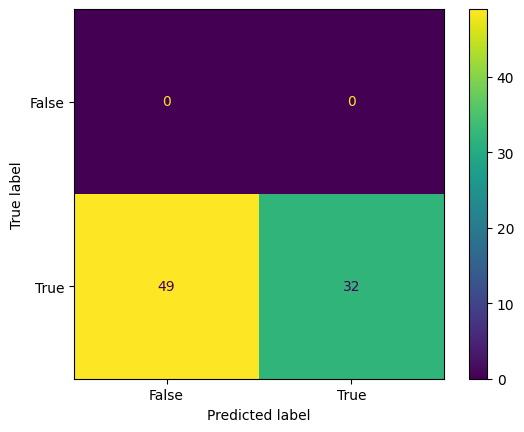

In [15]:
X=data_train["index"].values.astype("int").reshape(-1, 1)
y = data_train["pun_label"].values
X_train, X_test1,y_train,y_test1 = train_test_split(X,y,test_size=0.2,random_state=7)
X=data_test3["index"].values.astype("int").reshape(-1, 1)
y = data_test3["pun_label"].values 
X_train1, X_test,y_train1,y_test = train_test_split(X,y,test_size=0.9,random_state=7)

#X_train, y_train = train.drop("target"), train["target"]
#X_test, y_test = test.drop("target"), test["target"]

clf=RandomForestClassifier()
clf.fit(X_train, y_train)
pred_labels=clf.predict(X_test)
print("Classes: ",clf.classes_)
score=clf.score(X_test,y_test)
print("\n*--------------------------------------------------*\n")
print("Score: ",score)
print("\n*--------------------------------------------------*\n")
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print("\n*--------------------------------------------------*\n")
print( classification_report(y_test,pred_labels))
print("\n*--------------------------------------------------*\n")
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()


In [16]:
def naive_Bayes(X,y,typ):
    model=typ
    clf=model.fit(X_train,y_train)
    pred_labels=model.predict(X_test)
    print("Classes: ",clf.classes_)
    print("\n*--------------------------------------------------*\n")
    if str(typ)=='GaussianNB()':
        print("Class Priors: ", clf.class_prior_)
    else:
        print("Class Priors: ", clf.class_log_prior_)
    score=model.score(X_test,y_test)
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
    disp.plot()

    plt.show()
    return X_train,X_test,y_train,y_test,clf,pred_labels

Classes:  [False  True]

*--------------------------------------------------*

Class Priors:  [0.49890659 0.50109341]

*--------------------------------------------------*

Score:  0.3950617283950617

*--------------------------------------------------*

Training set score: 0.8019
Test set score: 0.3951

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.40      0.57        81

    accuracy                           0.40        81
   macro avg       0.50      0.20      0.28        81
weighted avg       1.00      0.40      0.57        81


*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.40      0.57        81

    accuracy                           0.40        81
   macro avg       0.50      0.20      0

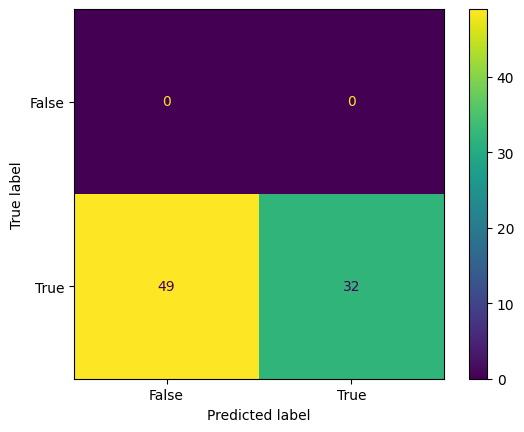

(array([[-1],
        [-1],
        [-1],
        ...,
        [-1],
        [-1],
        [-1]]),
 array([[10],
        [-1],
        [-1],
        [ 9],
        [13],
        [ 7],
        [ 6],
        [-1],
        [ 6],
        [ 8],
        [13],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [17],
        [13],
        [-1],
        [13],
        [-1],
        [-1],
        [14],
        [-1],
        [ 2],
        [24],
        [-1],
        [-1],
        [-1],
        [16],
        [ 2],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [13],
        [-1],
        [-1],
        [10],
        [12],
        [23],
        [ 8],
        [-1],
        [-1],
        [-1],
        [-1],
        [15],
        [ 6],
        [-1],
        [-1],
        [-1],
        [22],
        [-1],
        [-1],
        [-1],
        [-1],
        [ 9],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
     

In [17]:
naive_Bayes(X,y, GaussianNB())


*--------------------------------------------------*

Score:  0.35802469135802467

*--------------------------------------------------*

Training set score: 0.7882
Test set score: 0.3580

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.36      0.53        81

    accuracy                           0.36        81
   macro avg       0.50      0.18      0.26        81
weighted avg       1.00      0.36      0.53        81


*--------------------------------------------------*



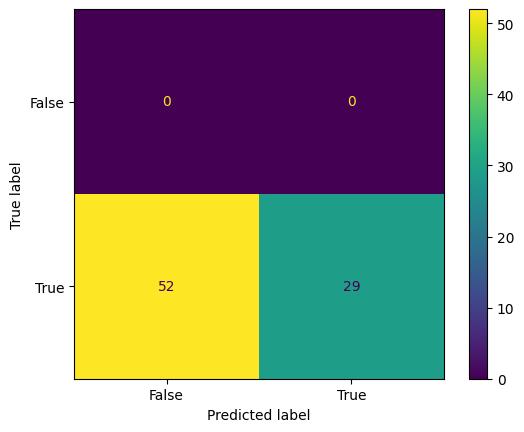

(array([[-1],
        [-1],
        [-1],
        ...,
        [-1],
        [-1],
        [-1]]),
 array([[10],
        [-1],
        [-1],
        [ 9],
        [13],
        [ 7],
        [ 6],
        [-1],
        [ 6],
        [ 8],
        [13],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [17],
        [13],
        [-1],
        [13],
        [-1],
        [-1],
        [14],
        [-1],
        [ 2],
        [24],
        [-1],
        [-1],
        [-1],
        [16],
        [ 2],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [13],
        [-1],
        [-1],
        [10],
        [12],
        [23],
        [ 8],
        [-1],
        [-1],
        [-1],
        [-1],
        [15],
        [ 6],
        [-1],
        [-1],
        [-1],
        [22],
        [-1],
        [-1],
        [-1],
        [-1],
        [ 9],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
     

In [18]:
def generic_fun(X,y,typ):
    model=typ
    clf=model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    pred_labels=model.predict(X_test)
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
      
    disp.plot()

    plt.show()
    return X_train,X_test,y_train,y_test,clf,pred_labels
generic_fun(X,y, RidgeClassifier() )


[[-0.58626021]
 [-0.58626021]
 [-0.58626021]]
Percent:  0.3950617283950617
Training set score: 0.8019
Test set score: 0.3951

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.40      0.57        81

    accuracy                           0.40        81
   macro avg       0.50      0.20      0.28        81
weighted avg       1.00      0.40      0.57        81


*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.40      0.57        81

    accuracy                           0.40        81
   macro avg       0.50      0.20      0.28        81
weighted avg       1.00      0.40      0.57        81


*--------------------------------------------------*



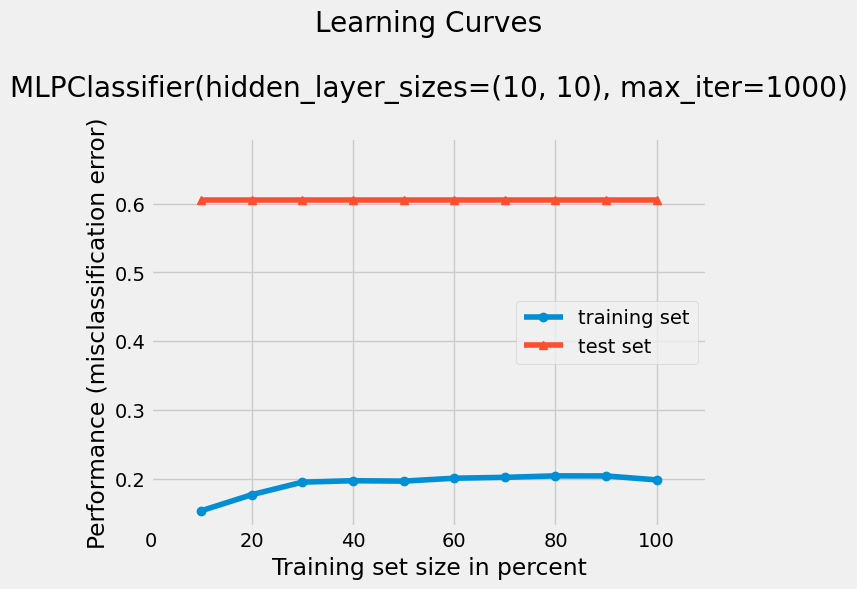

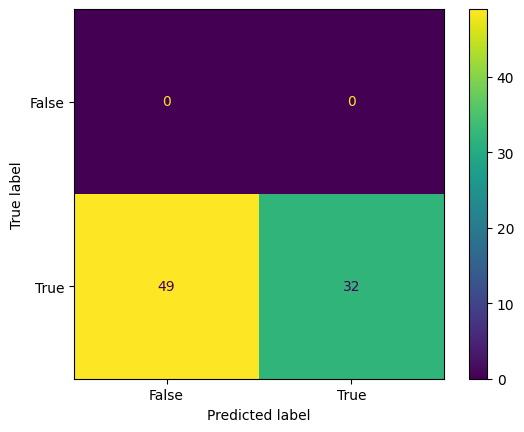

In [19]:
def neural_network(hidden_layer_sizes,max_iter,activation,solver,learning_rate,X,y):
    scaler = StandardScaler()

    scaler.fit(X_train)

    train_data = scaler.transform(X_train)
    test_data = scaler.transform(X_test)
    print(train_data[:3])

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate)

    mlp.fit(train_data, y_train)
    pred_labels=mlp.predict(X_test)
    predictions_train = mlp.predict(train_data)
    predictions_test = mlp.predict(test_data)
    percent = (mlp.score(test_data, y_test))
    print("Percent: ",percent)
    print('Training set score: {:.4f}'.format(mlp.score(train_data, y_train)))
    print('Test set score: {:.4f}'.format(mlp.score(test_data, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    plot_learning_curves(X_train, y_train, X_test, y_test,mlp)
    y_pred = mlp.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
      
    disp.plot()

    plt.show()
    plt.show()
    return ["Neural Network", percent, mlp]
r=neural_network((10, 10),1000,'relu','adam','constant',X,y)

In [20]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=4395713 sha256=7ec026a8f1408977c1bd920bce898526d3fe42faf325ee64d7a6e9408eaf1abf
  Stored in directory: /root/.cache/pip/wheels/64/57/bc/1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fasttext


In [ ]:
#doesn't work
import fasttext
model = fasttext.train_supervised(input="train.txt")
model.predict("flour")
print(model.test("test.txt") )
text = "coach"
labels, prob = model.predict(text)
print("Label:", labels)
print("Probability:", prob)